In [16]:
import numpy as np
import matplotlib.pyplot as plt
from highway_env.road.lane import StraightLane
from highway_env.road.road import Road, RoadNetwork
from highway_env.vehicle.controller import ControlledVehicle
from highway_env.vehicle.kinematics import Vehicle

In [20]:
road = Road(RoadNetwork.straight_road_network(1))
v = ControlledVehicle(road=road, position=road.network.get_lane(("0", "1", 0)).position(0, 0), speed=0, heading=0)

FPS = 15 #frames per second
time_sec = 40 #total time simulation
t = time_sec * FPS 
ran_t = range(time_sec)
count = 0

# states variables
posx = np.zeros(time_sec)
posy = np.zeros(time_sec)
acc = np.zeros(time_sec)
target_vel = np.zeros(time_sec)
vel = np.zeros(time_sec)
heading = np.zeros(time_sec)


for i in range(t):
  
    if i  == 3 * FPS or i == 13 * FPS: 
        v.act('FASTER')
    
    
    if i == 25 * FPS: #or i == 25:
        v.act('SLOWER')

    if i == 5 * FPS:
        v.act({ 'steering': 0.5})

    v.act(dt = 1/FPS)
    v.step(dt=1/FPS)

    if i % FPS == 0:
      
        vel[count] = v.speed
        target_vel[count] = v.target_speed
        acc[count] = v.speed_control(v.target_speed)
        posx[count] = v.position[0]
        posy[count] = v.position[1]
        count = count +1

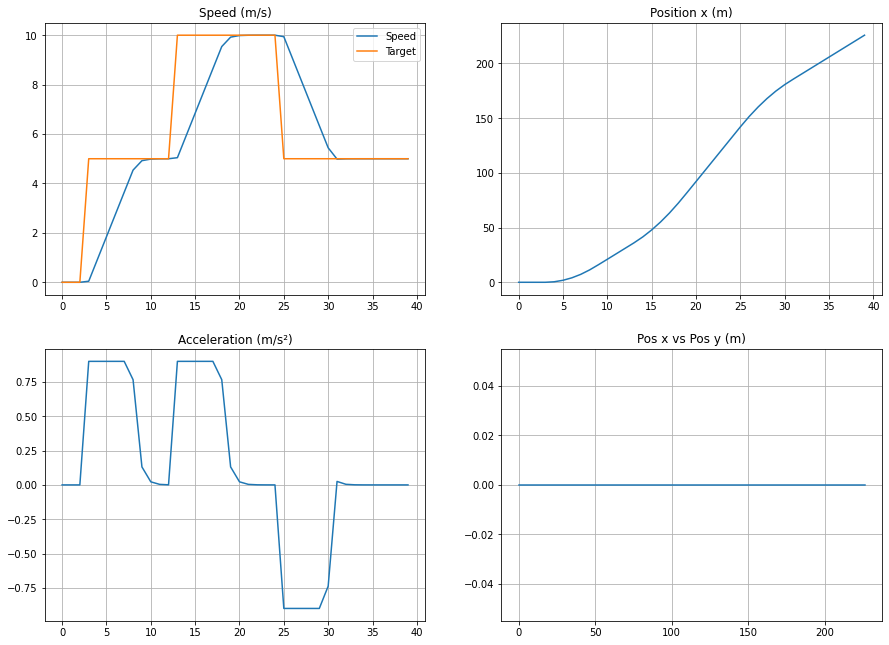

In [21]:
fig = plt.figure(figsize=(15, 11))


plt.subplot(2, 2, 1)
plt.title('Speed (m/s)')
plt.plot(ran_t,vel,label = "Speed")
plt.plot(ran_t, target_vel, label = "Target")
plt.legend()
plt.grid()


plt.subplot(2, 2, 2)
plt.title('Position x (m)')
plt.plot(ran_t,posx)
plt.grid()

plt.subplot(2, 2, 3)
plt.title('Acceleration (m/s²)')
plt.plot(ran_t,acc)
plt.grid()

plt.subplot(2, 2, 4)
plt.title('Pos x vs Pos y (m)')
plt.plot(posx,posy)

plt.grid()
plt.show()

---

In [22]:
road = Road(RoadNetwork.straight_road_network(2))
v = ControlledVehicle(road=road, position=road.network.get_lane(("0", "1", 0)).position(0, 0), speed=0, heading=0)


FPS = 15 #frames per second
time_sec = 35 #total time simulation
t = time_sec * FPS 
ran_t = range(time_sec)
count = 0

# states variables
posx = np.zeros(time_sec)
posy = np.zeros(time_sec)
acc = np.zeros(time_sec)
target_vel = np.zeros(time_sec)
vel = np.zeros(time_sec)
heading = np.zeros(time_sec)
lat_vel = np.zeros(time_sec)



for i in range(t):
  
    if i  == 2 * FPS or i == 3 * FPS: 
        v.act('FASTER')
    
    if i == 10 * FPS: 
        v.act('LANE_RIGHT')

    if i == 20 * FPS: 
        v.act('LANE_LEFT')
        
    v.act(dt = 1/FPS)
    v.step(dt=1/FPS)

    if i % FPS == 0:
      
        vel[count] = v.speed
        target_vel[count] = v.target_speed
        acc[count] = v.speed_control(v.target_speed)
        posx[count] = v.position[0]
        posy[count] = v.position[1]
        lat_vel[count] = v.lat_speed
        heading[count] = v.steering_angle
        count = count +1

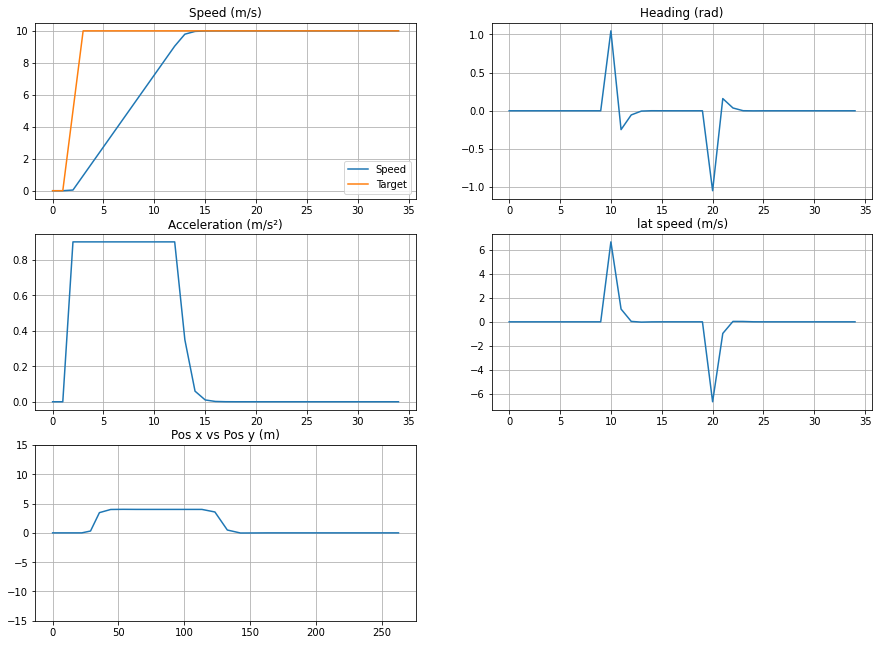

In [23]:
fig = plt.figure(figsize=(15, 11))


plt.subplot(3, 2, 1)
plt.title('Speed (m/s)')
plt.plot(ran_t,vel,label = "Speed")
plt.plot(ran_t, target_vel, label = "Target")
plt.legend()
plt.grid()

plt.subplot(3, 2, 2)
plt.title('Heading (rad)')
plt.plot(ran_t,heading, label = "Target")
plt.grid()

plt.subplot(3, 2, 3)
plt.title('Acceleration (m/s²)')
plt.plot(ran_t,acc)
plt.grid()

plt.subplot(3, 2, 4)
plt.title('lat speed (m/s)')
plt.plot(ran_t,lat_vel, label = "Target")
plt.grid()

plt.subplot(3, 2, 5)
plt.title('Pos x vs Pos y (m)')
plt.ylim(-15, 15)
plt.plot(posx,posy)
plt.grid()

plt.show()